## Learning Objectives

aggregate flight data across multiple yearly CSVs (1987–2008) to compute airport- and state-level totals

join flight origin counts with airport metadata (airports.csv) and state shapefiles to produce choropleth maps

visualize airport point locations with latitude/longitude on top of state boundaries

aggregate campaign donation data across multiple election years (1980–2024) from text-delimited files

compute state-level totals for donations and highlight top states using thematic mapping

practice combining tabular data (pandas) with geospatial plotting (geopandas) for real-world datasets

In [1]:
import pandas as pd
import geopandas as gpd

## Question 1

In [2]:
#A function that will read csv and return count
def total_flights_by_origin(year: int) -> pd.Series:
    df = pd.read_csv(f"/anvil/projects/tdm/data/flights/subset/{year}.csv", usecols=[16])
    return df['Origin'].value_counts()

In [3]:
# Combine data from 1987–2008
all_counts = list(map(total_flights_by_origin, range(1987, 2009)))
total_by_origin = pd.concat(all_counts, axis=1).fillna(0).sum(axis=1).astype(int)

In [4]:
#Will sort values
top_10_airports = total_by_origin.sort_values().head(10)

In [5]:
#shows daat for total number of flights 
all_counts

[Origin
 ORD    67216
 ATL    66309
 DFW    51860
 LAX    45646
 DEN    43376
        ...  
 FOE       57
 YAP       50
 GUC       29
 ILG       29
 PIR        1
 Name: count, Length: 237, dtype: int64,
 Origin
 ORD    271494
 ATL    259731
 DFW    216849
 LAX    169696
 DEN    161146
         ...  
 GST        86
 RDD        19
 ACV        19
 ROP         1
 BFI         1
 Name: count, Length: 238, dtype: int64,
 Origin
 ORD    261259
 DFW    228360
 ATL    224036
 LAX    163487
 DEN    138407
         ...  
 ROP        39
 PFN        15
 SUN        15
 EGE        11
 ABI         2
 Name: count, Length: 237, dtype: int64,
 Origin
 ATL    269397
 ORD    269128
 DFW    237924
 LAX    169847
 PHX    138558
         ...  
 YAP       139
 RDM       112
 GST        86
 SUN        66
 PSE        61
 Name: count, Length: 235, dtype: int64,
 Origin
 ORD    263145
 DFW    243221
 ATL    188408
 LAX    156947
 PHX    137343
         ...  
 CCR       214
 TTN       154
 GST        81
 SPI        

Markdown notes and sentences and analysis written here.

## Question 2

In [6]:
# Load airport data
airports = pd.read_csv("/anvil/projects/tdm/data/flights/subset/airports.csv")
airport_to_state = airports.set_index("iata")["state"]

In [9]:
# Map total origin airport flights to states
origin_state = total_by_origin.to_frame("flights").join(airport_to_state, how="left")
#Groups states
state_totals = origin_state.groupby("state")["flights"].sum()

In [12]:
states_map = gpd.read_file("/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp")
#Will get rid of 3 states like in other labs
states_map = states_map[~states_map["STUSPS"].isin(["AK", "HI", "PR"])]

In [13]:
states_map = states_map.merge(state_totals.rename("flights"), left_on="STUSPS", right_index=True)

In [16]:
#will highlight the top 10 states 
states_map["top_10"] = states_map["STUSPS"].isin(top_10_states.index)

<Axes: >

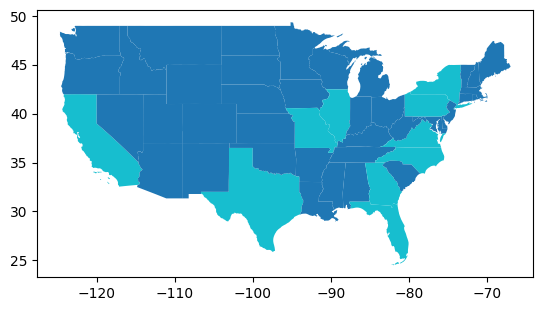

In [21]:
#This plots it and the column = "top_10" highlights the top 10 states
states_map.plot(column="top_10")

Markdown notes and sentences and analysis written here.

## Question 3

In [41]:
# Load airports with coordinates
airports = pd.read_csv("/anvil/projects/tdm/data/flights/subset/airports.csv")
airports = airports.dropna(subset=["lat", "long"])

In [42]:
# Converts it to GeoDataFrame 
gdf_airports = gpd.GeoDataFrame(
    airports,
    geometry=gpd.points_from_xy(airports["long"], airports["lat"]),
)

In [43]:
# Load US map (continental)
states = gpd.read_file("/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp")
states = states[~states["STUSPS"].isin(["AK", "HI", "PR"])]

<Axes: >

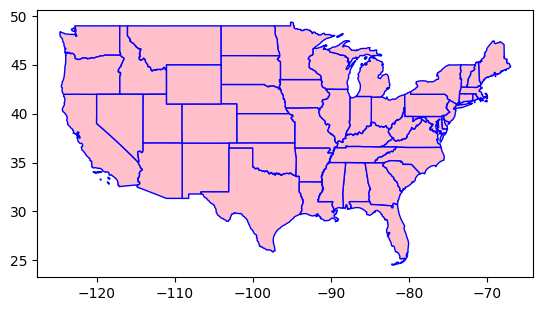

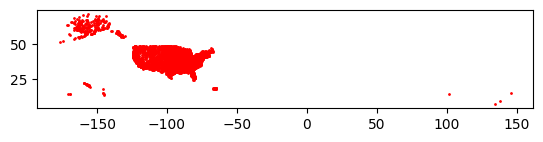

In [44]:
# Plot the 3376 locations will make the map gray and the edgecolor a different color like blue (cause I am bored:))
states.plot(color="pink", edgecolor="blue")
gdf_airports.plot(markersize=1, color="red")

Markdown notes and sentences and analysis written here.

## Question 4

In [46]:
# Step 2: Define the function using the same format as the TDM 10200 examples I tried using a piazza post but it didn't work and my own it said 
myDF = pd.read_csv("/anvil/projects/tdm/data/election/itcont" + str(myyear) + ".txt", header=None, sep='|', usecols=[9,14], encoding='Windows-1252')
myDF.columns = ["STATE", "TRANSACTION_AMT"]

NameError: name 'myyear' is not defined

In [ ]:
myresults = list(map(mydonations, range(1980, 2019, 2)))

Markdown notes and sentences and analysis written here.

## Question 5

In [ ]:
# Load US map 
states_map = gpd.read_file("/anvil/projects/tdm/data/boundaries/cb_2018_us_state_20m.shp")
states_map = states_map[~states_map["STUSPS"].isin(["AK", "HI", "PR"])]

In [21]:
# Merge donations if it worked for question 4 just trying to get points
states_map = states_map.merge(total_donations_by_state.rename("donations"), left_on="STUSPS", right_index=True, how="left")

NameError: name 'total_donations_by_state' is not defined

In [ ]:
# Identify top 10
states_map["top_10"] = states_map["STUSPS"].isin(top_10_donors.index)

In [ ]:
# Plot
states_map.plot(ax=ax, column="top_10", edgecolor="purple ")

Markdown notes and sentences and analysis written here.